In [45]:
import numpy as np
import matplotlib.pyplot as plt

In [46]:
plt.rcParams["figure.figsize"] = (7,7)

*Bessel function: $J_m(x) = \frac{1}{\pi}\int_{0}^{\pi} \cos(mt - x\sin t)dt$*

In [47]:
precision = 1e-10

### Simpson and Trapez integration:

In [62]:
simpsonRule = lambda f, a, b: (f(a) + 4 * f((a+b)/2) + f(b)) / 6
trapezoidalRule = lambda f, a, b: (f(a) + f(b)) / 2
def Integrate(f, a, b, rule, N=2**7):
    step = (b - a) / N
    left = a
    right = a + step
    _sum = 0
    for i in range(N):
        _sum += rule(f, left, right)
        left += step
        right += step
    return _sum * step

## Bessel function:

In [63]:
def J(x: float, m: int, rule=simpsonRule):
    function = lambda t: np.cos(m * t - x * np.sin(t))
    result = Integrate(function, 0, np.pi, rule)
    return (1/np.pi) * result

*We know that:*
$J_1(0.8) = 0.3688$ \
check

In [65]:
J(0.8, 1)

0.3688420460941722

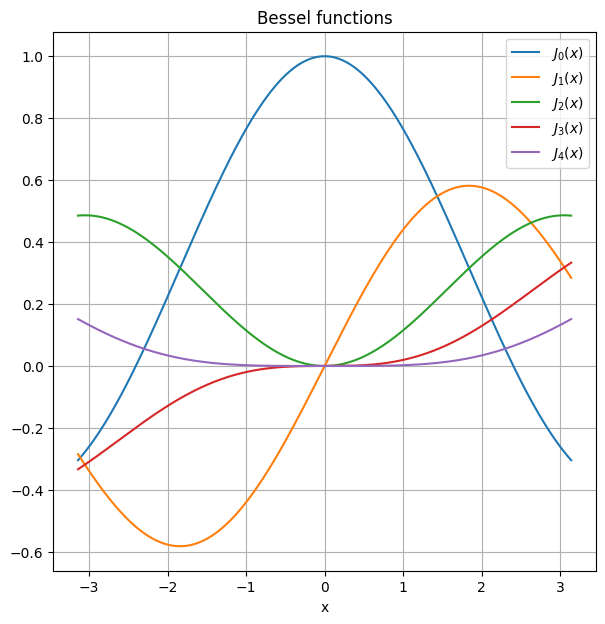

In [64]:
dom = np.linspace(-np.pi, np.pi, int(1e4))
orders = 5
for i in range(orders):
    plt.plot(dom, J(dom, i), label="$J_{}(x)$".format(i))
plt.title("Bessel functions")
plt.xlabel("x")
plt.grid()
plt.legend(loc='best')
plt.show()

## Bessel function derivative:

In [90]:
# def dJ(x: float, m: int, rule=simpsonRule, delta=1e-5):
#     return (J(x + delta, m, rule) - J(x - delta, m, rule)) / (2 * delta)
def dJ(x: float, m: int, rule=simpsonRule, delta=1e-6):
    return (2/3*J(x + delta, m, rule) - 1/12*J(x + 2*delta, m, rule) + 1/12*J(x - 2*delta, m, rule) - 2/3*J(x - delta, m, rule)) / delta

$J_0'(x) + J_1(x) = 0$ where x $\in$ [$0$, $2\pi$]

In [91]:
precision = 0
a = 0 + precision
b = 2 * np.pi - precision
domain = np.linspace(a, b, int(1e3))

resultSimp = np.vectorize(lambda x: dJ(x, 0, simpsonRule)     + J(x, 1, simpsonRule)    )(domain)
resultTrap = np.vectorize(lambda x: dJ(x, 0, trapezoidalRule) + J(x, 1, trapezoidalRule))(domain)

# assert np.all(resultSimp < precision)
# assert np.all(resultTrap < precision)

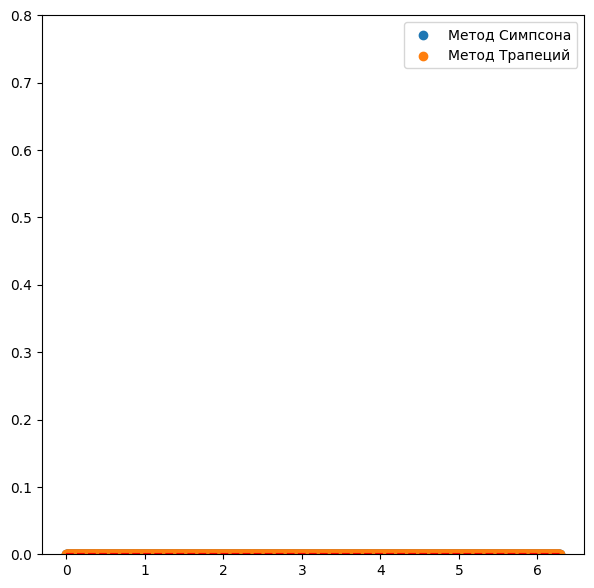

In [92]:
plt.scatter(domain, np.abs(resultSimp), label="Метод Симпсона")
plt.scatter(domain, np.abs(resultTrap), label="Метод Трапеций")

plt.hlines(precision, xmin=domain[0], xmax=domain[-1], linestyles='--', color='red')
plt.ylim([0, 0.8])
plt.legend(loc='best')
plt.show()

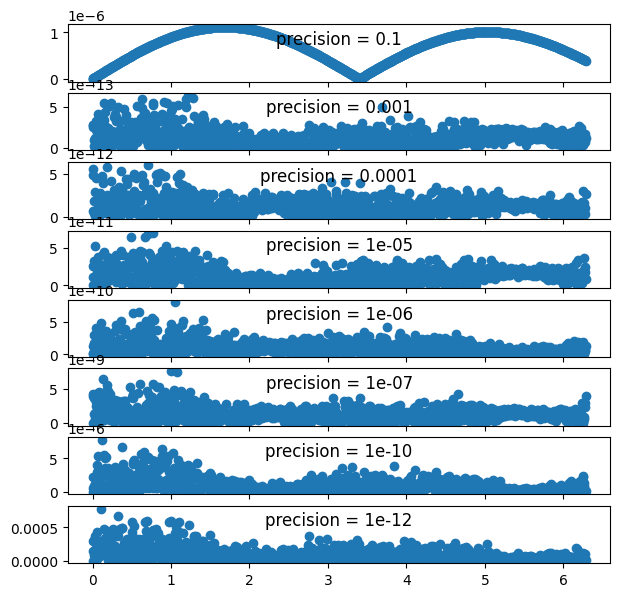

In [94]:
H = [1e-1, 1e-3, 1e-4 ,1e-5, 1e-6, 1e-7, 1e-10, 1e-12]
#H = [1e-10, 1e-12, 1e-14, 1e-16]
precision = 1e-12
a = 0 + precision
b = 2 * np.pi - precision
domain = np.linspace(a, b, int(1e3))

fg, ax = plt.subplots(len(H), 1, sharex=True)
for i in range(len(H)):    
    result = np.vectorize(lambda x: dJ(x, 0, delta=H[i]) + J(x, 1))(domain)
    ax[i].scatter(domain, abs(result))
    ax[i].set_title("precision = {}".format(H[i]), y=1.0, pad=-14)
    #ax[i].hlines(precision, xmin=domain[0], xmax=domain[-1], linestyles='--', color='red')